### シンプルな例を用いた、ROC、AUCの説明

In [1]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
predict = pd.Series([0.9,0.85,0.8,0.8,0.7,0.7,0.65,0.55,0.55,0.5,0.4,0.4,0.3,0.25,0.1])
actual_original = pd.Series(["T","F","T","T","F","T","T","T","T","T","T","F","F","T","F"])

In [3]:
mapping = {"T":1,"F":0}
actual = actual_original.map(mapping)

In [4]:
df = pd.DataFrame({"Actual":actual, "Predict":predict})
df

,Actual,Predict
0,1,0.90
1,0,0.85
2,1,0.80
3,1,0.80
4,0,0.70
5,1,0.70
6,1,0.65
7,1,0.55
8,1,0.55
9,1,0.50


- sklearn.metrics.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [5]:
fpr, tpr, thresholds = roc_curve(df["Actual"], df["Predict"], pos_label=1, drop_intermediate=False)
# drop_intermediate=False: 省略しないように学習時はFalseとしておく

In [6]:
# True Positive Rate（実際に1で、1と予想）
tpr

array([0.1, 0.1, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9, 0.9, 1. , 1. ])

In [7]:
# False Positive Rate（実際に0で、1と予想）
fpr

array([0. , 0.2, 0.2, 0.4, 0.4, 0.4, 0.4, 0.6, 0.8, 0.8, 1. ])

In [8]:
# 予測値（重複無し）
thresholds

array([0.9 , 0.85, 0.8 , 0.7 , 0.65, 0.55, 0.5 , 0.4 , 0.3 , 0.25, 0.1 ])

In [9]:
pd.DataFrame({"TPR":tpr, "FPR":fpr, "Thresholds":thresholds})

,TPR,FPR,Thresholds
0,0.1,0.0,0.90
1,0.1,0.2,0.85
2,0.3,0.2,0.80
3,0.4,0.4,0.70
4,0.5,0.4,0.65
5,0.7,0.4,0.55
6,0.8,0.4,0.50
7,0.9,0.6,0.40
8,0.9,0.8,0.30
9,1.0,0.8,0.25


- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc

In [10]:
auc(fpr, tpr)

0.64

- http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

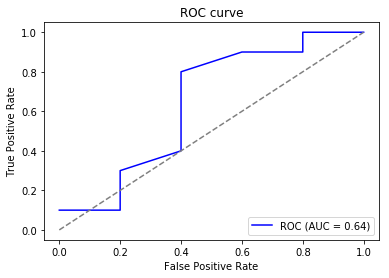

In [11]:
plt.plot(fpr, tpr, color="blue", label='ROC (AUC = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

- AUCのみ計算する場合
- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [12]:
roc_auc_score(y_true=df["Actual"], y_score=df["Predict"])

0.64

## その他の見せ方

In [13]:
n_obs = df.shape[0]    # オブザベーション数
n_bin = 3   # binの数
n_obs_bin = n_obs/n_bin   # bin内のオブザベーション数

In [14]:
bin_label = [i for i in range(n_bin)]
bin_label_df = np.repeat(bin_label, n_obs_bin)

In [15]:
df2 = df.copy()

In [16]:
df2["bin_label"] = bin_label_df
df2

,Actual,Predict,bin_label
0,1,0.90,0
1,0,0.85,0
2,1,0.80,0
3,1,0.80,0
4,0,0.70,0
5,1,0.70,1
6,1,0.65,1
7,1,0.55,1
8,1,0.55,1
9,1,0.50,1


In [17]:
# Accuracyのグループ（bin_label）別平均
df2.groupby("bin_label")["Actual"].mean()

bin_label
0    0.6
1    1.0
2    0.4
Name: Actual, dtype: float64

In [18]:
# Accuracyの全体平均
df2["Actual"].mean()

0.6666666666666666

## Quiz

In [19]:
predict_quiz = pd.Series([0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.4,0.4,0.4,0.35,0.3,0.25])

In [20]:
df2 = pd.DataFrame({"Actual":actual, "Predict":predict, "PredictQuiz":predict_quiz})
df2

,Actual,Predict,PredictQuiz
0,1,0.90,0.80
1,0,0.85,0.75
2,1,0.80,0.70
3,1,0.80,0.65
4,0,0.70,0.60
5,1,0.70,0.55
6,1,0.65,0.50
7,1,0.55,0.45
8,1,0.55,0.40
9,1,0.50,0.40


In [21]:
fpr_quiz, tpr_quiz, thresholds_quiz = roc_curve(df2["Actual"], df2["PredictQuiz"], pos_label=1, drop_intermediate=False)
# drop_intermediate=False: 省略しないように学習時はFalseとしておく

In [22]:
# ExampleのAUC
auc(fpr, tpr)

0.64

In [23]:
# QuizデータのAUC
auc(fpr_quiz, tpr_quiz)

0.61

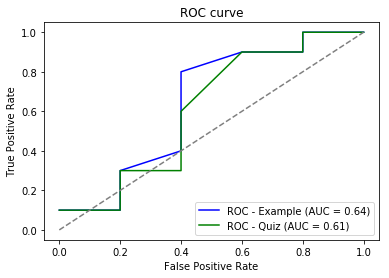

In [24]:
plt.plot(fpr, tpr, color="blue", label='ROC - Example (AUC = %0.2f)' % auc(fpr, tpr))
plt.plot(fpr_quiz, tpr_quiz, color="green", label='ROC - Quiz (AUC = %0.2f)' % auc(fpr_quiz, tpr_quiz))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()